In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, average_precision_score

In [23]:
df = pd.read_csv('datasets/diabetes.csv')
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [24]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [25]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5986644da0>,
      dtype=object)

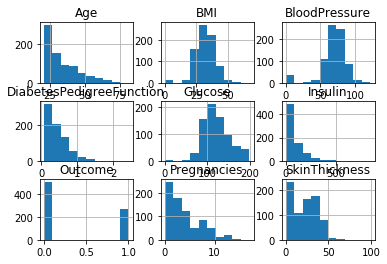

In [26]:
df.hist()

We see that there is missing data represented with `0` in some columns, so we need to replace that. First we try to find out how many rows have missing data.

`drop` returns a dataframe where if `axis=0`, rows are dropped, if `axis=1`, columns are dropped. First paramter is a list which need to be dropped.

In [27]:
df2 = df.drop(['Pregnancies', 'Outcome'], axis=1)

for column in df2.columns.values.tolist():
    vals = df2[column].value_counts()
    if 0 in vals:
        print(f'{column} : {vals[0]}')
    else:
        print(f'{column} : No zeroes')

Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : No zeroes
Age : No zeroes


We use `replace` to replace `0` with `np.nan`, so that we can use `fillna`. `inplace=True` means save instead of returning.

In [28]:
df2.replace(0, np.nan, inplace=True)

`fillna` replaces every column's `NaN` with the mean of that column.

In [29]:
df2.fillna(df2.mean(), inplace=True)

In [30]:
df2.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   121.686763      72.405184      29.153420  155.548223   32.457464   
std     30.435949      12.096346       8.790942   85.021108    6.875151   
min     44.000000      24.000000       7.000000   14.000000   18.200000   
25%     99.750000      64.000000      25.000000  121.500000   27.500000   
50%    117.000000      72.202592      29.153420  155.548223   32.400000   
75%    140.250000      80.000000      32.000000  155.548223   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age  
count                768.000000  768.000000  
mean                   0.471876   33.240885  
std                    0.331329   11.760232  
min                    0.078000   21.000000  
25%                    0.243750   24.000000  
50%                    0.372500   29.000000  
75%                    0.626250   41.000000  
max                    2.420000   81.000000

We are done with replacing the missing data. Now we need to replace this data in the original dataframe. We use `iloc` to work with the table as if we were working with a 2D array. `iloc` is used as `iloc[rows, columns]`, when we use `iloc[:, 1:-1]` we mean all rows, and leave first column(denoted by `1`) and last column(denoted by `-1`).

In [31]:
df.iloc[:, 1:-1] = df2

In [32]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

We need features and labels separated.

In [34]:
x, y = df.drop('Outcome', axis=1), df['Outcome']

I have scaled the data in hope of increased accuracy. Scaling data is required for some machine learning algorithms.

In [35]:
x_scaled = pd.DataFrame(StandardScaler().fit_transform(x), index=x.index, columns=x.columns)

/home/aero/ml_venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/aero/ml_venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
x_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  
0  0.166292                  0.468492  1.425995  
1 -0.852531                 -0.365061 -0.190672  
2 -1.332833                  0.604397 -0.105584  
3 -0.634212                 -0.920763 -1.041549  
4  1.548980                  5.484909 -0.020496

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [39]:
sknb = GaussianNB()

In [40]:
sknb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
sknb.score(x_test, y_test)

0.7857142857142857

In [42]:
y_predict = sknb.predict(x_test)

In [43]:
cfmx = confusion_matrix(y_test, y_predict)

In [44]:
cfmx

array([[92, 15],
       [18, 29]])

In [45]:
average_precision_score(y_test, y_predict)

0.5235562310030395

In [46]:
sknb2 = GaussianNB()

In [47]:
x_train2, x_test2 = x_train[['BMI', 'Age']], x_test[['BMI', 'Age']]

In [48]:
sknb2.fit(x_train2, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
sknb2.score(x_test2, y_test)

0.7012987012987013

In [50]:
sknb4 = GaussianNB()

In [51]:
x_train4, x_test4 = x_train[['BMI', 'Age', 'Glucose', 'Insulin']], x_test[['BMI', 'Age', 'Glucose', 'Insulin']]

In [52]:
sknb4.fit(x_train4, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
sknb4.score(x_test4, y_test)

0.7922077922077922